In [1]:
# importing the important libary
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt


In [2]:
# fetch the data from yahoo finance
import yfinance as yf
import pandas as pd
import datetime as dt

# Define the ticker symbol and date range
ticker_symbol = "AAPL"
start_date = "2018-01-01"
end_date = dt.datetime.now()

# Download historical data using yfinance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Create a Pandas DataFrame
df = pd.DataFrame(data)


[*********************100%%**********************]  1 of 1 completed


In [3]:
df=df.reset_index()

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615894,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608822,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797436,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200
...,...,...,...,...,...,...,...
1632,2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
1633,2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
1634,2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200
1635,2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615894,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608822,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797436,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200


In [6]:
df=df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,42.540001,43.075001,42.314999,43.064999,102223600
1,43.132500,43.637501,42.990002,43.057499,118071600
2,43.134998,43.367500,43.020000,43.257500,89738400
3,43.360001,43.842499,43.262501,43.750000,94640000
4,43.587502,43.902500,43.482498,43.587502,82271200


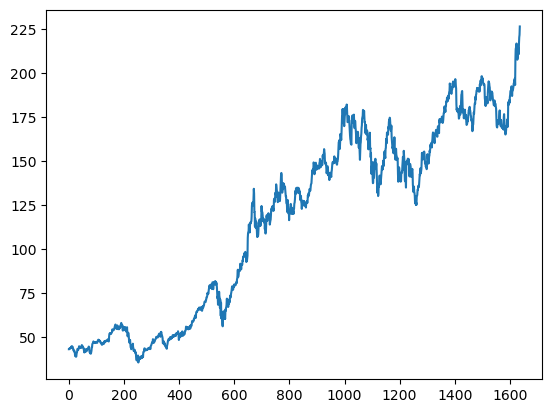

In [7]:
plt.plot(df.Close)

In [8]:
#using rolling function to find thr mean of before of 100 values
ma100= df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1632    183.3764
1633    183.6509
1634    183.9595
1635    184.2918
1636    184.6667
Name: Close, Length: 1637, dtype: float64

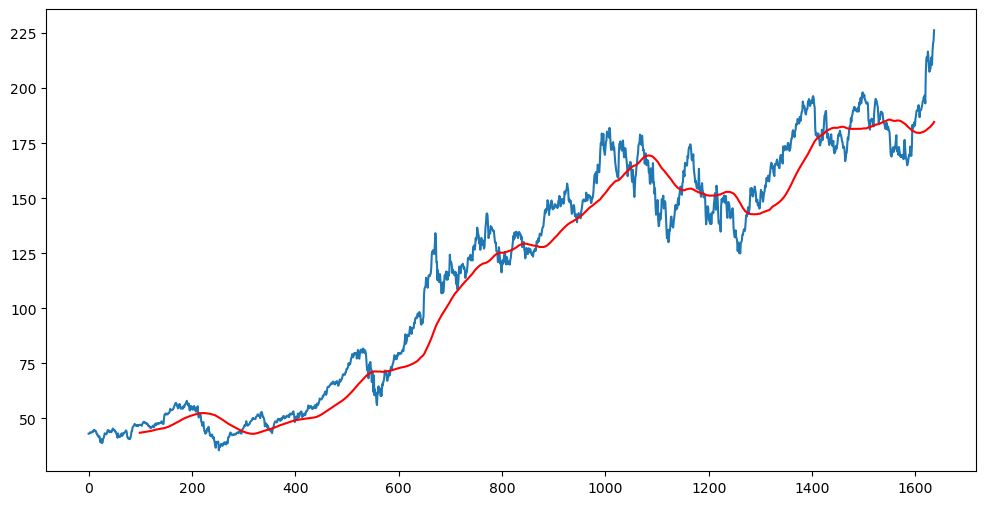

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
#using rolling function to find thr mean of before of 100 values
ma200= df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1632    183.69585
1633    183.90855
1634    184.13120
1635    184.36390
1636    184.60575
Name: Close, Length: 1637, dtype: float64

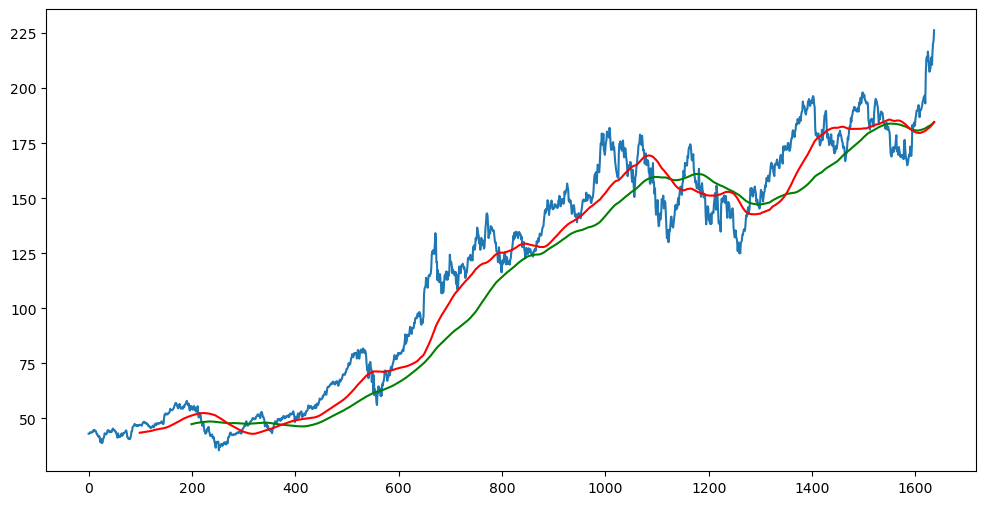

In [11]:
# Moving average graph
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [12]:
df.shape

(1637, 5)

In [13]:
#Splitting the data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training)
print(data_testing)

           Close
0      43.064999
1      43.057499
2      43.257500
3      43.750000
4      43.587502
...          ...
1140  148.470001
1141  150.169998
1142  147.070007
1143  151.000000
1144  153.039993

[1145 rows x 1 columns]
           Close
1145  155.350006
1146  154.089996
1147  152.949997
1148  151.600006
1149  156.789993
...          ...
1632  210.619995
1633  216.750000
1634  220.270004
1635  221.550003
1636  226.339996

[492 rows x 1 columns]


In [14]:
data_training.head()

,Close
0,43.064999
1,43.057499
2,43.257500
3,43.750000
4,43.587502


In [15]:
data_testing.head()

,Close
1145,155.350006
1146,154.089996
1147,152.949997
1148,151.600006
1149,156.789993


In [16]:
#Now to convert training data into range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [17]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.76144072],
       [0.78827348],
       [0.80220191]])

In [18]:
data_training_array.shape

(1145, 1)

In [19]:
# Now dividing the data in xtrain and ytrain
x_train= []
y_train = []


for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [20]:
x_train.shape

(1045, 100, 1)

In [21]:
#LSTM model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,input_shape=(x_train.shape[1],1))) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.2)) 

model.add(LSTM(units=60, activation='relu', return_sequences=True)) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.3)) 

model.add(LSTM(units=80, activation='relu', return_sequences=True)) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.4)) 

model.add(LSTM(units=120, activation='relu')) # input_shape=(numberof steps , no. of columns you work)
model.add(Dropout(0.5)) 

model.add(Dense(units=1))


c:\USERS\RISHI\ANACONDA3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.1538
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0160
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0101
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0094
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0088
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0094
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0088
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0084
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0072
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0080
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 0.0079
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0073
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0071
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0081
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - l

In [25]:
model.save('my_model.keras')

In [26]:
data_testing.head()

,Close
1145,155.350006
1146,154.089996
1147,152.949997
1148,151.600006
1149,156.789993


In [27]:
past_100_days  = data_training.tail(100)

In [28]:
past_100_days

,Close
1045,164.850006
1046,165.119995
1047,163.199997
1048,166.559998
1049,166.229996
...,...
1140,148.470001
1141,150.169998
1142,147.070007
1143,151.000000


In [29]:
data_testing

,Close
1145,155.350006
1146,154.089996
1147,152.949997
1148,151.600006
1149,156.789993
...,...
1632,210.619995
1633,216.750000
1634,220.270004
1635,221.550003


In [30]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [31]:
final_df.head()

,Close
0,164.850006
1,165.119995
2,163.199997
3,166.559998
4,166.229996


In [32]:
input_data = scaler.fit_transform(final_df)

In [33]:
input_data

array([[3.93111030e-01],
       [3.95775746e-01],
       [3.76825902e-01],
       [4.09988167e-01],
       [4.06731141e-01],
       [3.76529823e-01],
       [3.38334056e-01],
       [3.19976371e-01],
       [3.74358472e-01],
       [3.30635686e-01],
       [2.93229364e-01],
       [2.52664810e-01],
       [2.96782469e-01],
       [3.41196208e-01],
       [3.51362007e-01],
       [3.84524272e-01],
       [3.98341970e-01],
       [4.32293830e-01],
       [4.46012734e-01],
       [4.84109858e-01],
       [4.90525116e-01],
       [4.99210517e-01],
       [5.32372782e-01],
       [5.20627791e-01],
       [4.89439441e-01],
       [4.86478495e-01],
       [5.27240485e-01],
       [4.93880784e-01],
       [4.62001632e-01],
       [4.65061221e-01],
       [4.44828265e-01],
       [4.01993718e-01],
       [4.20844919e-01],
       [4.47887854e-01],
       [3.97453580e-01],
       [3.95282381e-01],
       [4.18278695e-01],
       [4.16600861e-01],
       [4.08606412e-01],
       [3.62909561e-01],


In [34]:
input_data.shape

(592, 1)

In [35]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [36]:
x_test,y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(492, 100, 1)
(492,)


In [37]:
#making predictions

y_predicted = model.predict(x_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step


In [38]:
y_predicted.shape

(492, 1)

In [39]:
y_test

array([2.99348693e-01, 2.86912750e-01, 2.75661275e-01, 2.62337244e-01,
       3.13560963e-01, 3.19088132e-01, 3.70015772e-01, 3.60146052e-01,
       3.45341472e-01, 4.05744259e-01, 4.02585877e-01, 3.98045890e-01,
       3.93308316e-01, 3.93801832e-01, 4.36439094e-01, 4.29036804e-01,
       4.64666498e-01, 4.75424457e-01, 4.73845265e-01, 4.88847281e-01,
       4.84899303e-01, 4.58942043e-01, 4.19956680e-01, 4.16600861e-01,
       4.19561807e-01, 4.44236106e-01, 3.80971167e-01, 3.58863091e-01,
       3.34484871e-01, 3.17805020e-01, 3.25108667e-01, 3.03888680e-01,
       2.91255450e-01, 3.05369228e-01, 2.90564648e-01, 3.19285418e-01,
       3.79095896e-01, 2.84445320e-01, 2.98953820e-01, 2.69936820e-01,
       2.53454406e-01, 2.90761934e-01, 3.14646638e-01, 2.83261001e-01,
       2.73588718e-01, 2.50789539e-01, 2.54145358e-01, 2.63916284e-01,
       2.44966441e-01, 1.72325297e-01, 1.30082909e-01, 1.72029218e-01,
       2.08053785e-01, 2.11014581e-01, 2.01440941e-01, 1.48736673e-01,
      

In [40]:
y_predicted


array([[0.18408804],
       [0.19093157],
       [0.19822091],
       [0.20590629],
       [0.2137117 ],
       [0.2217243 ],
       [0.22990644],
       [0.23855689],
       [0.24812809],
       [0.25862336],
       [0.27048817],
       [0.28402334],
       [0.29901835],
       [0.31461656],
       [0.32998377],
       [0.34469777],
       [0.35855252],
       [0.37170905],
       [0.38436458],
       [0.39659104],
       [0.40844086],
       [0.4198816 ],
       [0.43066055],
       [0.44019958],
       [0.44798264],
       [0.4537461 ],
       [0.45763278],
       [0.45955864],
       [0.45938614],
       [0.45686224],
       [0.45193842],
       [0.44488007],
       [0.43589723],
       [0.42492354],
       [0.41200173],
       [0.39735878],
       [0.38178277],
       [0.36644545],
       [0.3518803 ],
       [0.33842734],
       [0.32603306],
       [0.31439364],
       [0.30350247],
       [0.29369774],
       [0.28514975],
       [0.27782506],
       [0.27145156],
       [0.265

In [41]:
scaler.scale_

array([0.00986972])

In [42]:
scale_factor = 1/0.01090156
y_predicted= scale_factor*y_predicted
y_test=scale_factor*y_test

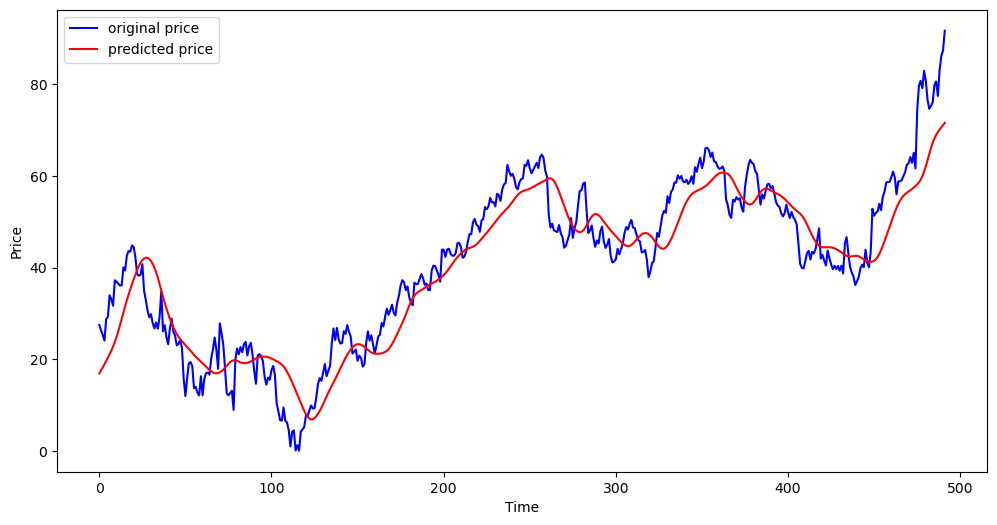

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='original price')
plt.plot(y_predicted,'r',label='predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()